<a href="https://colab.research.google.com/github/HEMA1188/PredictTakeHomeUsers/blob/main/TakeHomeUsers_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
%matplotlib inline

In [27]:
users = pd.read_csv('/content/takehome_users (1).csv',encoding = 'latin-1')

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [29]:
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [30]:
def get_graph1():
    years=users.creation_time.astype(str).str.slice(0,4)
    x = years.unique()
    y = years.groupby(years).count()
    plt.figure(figsize=[8,5])
    sns.set()
    sns.barplot(x,y,color='k')
    plt.text(x=1.5, y=4500, s= 'Total number \n of users:{}'.format(users.shape[0]),fontsize=18)

In [31]:
years=users.creation_time.astype(str).str.slice(0,4)
y = users.creation_source.groupby([users.creation_source,years]).count()
df =pd.DataFrame(y).unstack(level=0)
df

creation_source                                      \
creation_source    GUEST_INVITE ORG_INVITE PERSONAL_PROJECTS SIGNUP   
creation_time                                                         
2012                        540        948               519    470   
2013                        981       2021              1033    997   
2014                        642       1285               559    620   

                                    
creation_source SIGNUP_GOOGLE_AUTH  
creation_time                       
2012                           320  
2013                           644  
2014                           421

In [32]:
def get_graph2():
    f, a = plt.subplots(1,3)
    plt.figure(figsize=[10,20])
    df.xs('2012').plot(kind='bar',ax=a[0],figsize=(10,6), color='k',title=2012)
    df.xs('2013').plot(kind='bar',ax=a[1],figsize=(10,6),color='k',title=2013)
    df.xs('2014').plot(kind='bar',ax=a[2],figsize=(10,6),color='k',title=2014)
    plt.tight_layout()

In [33]:
users.corr(method ='pearson')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.001657
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.009387
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.007536
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003431
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.040868
invited_by_user_id,0.001657,0.009387,0.007536,0.003431,-0.040868,1.000000


In [34]:
def get_graph3():
    sns.heatmap(users.corr(), xticklabels=users.corr().columns, yticklabels=users.corr().columns)

In [35]:
users['last_session_creation_time']=users.last_session_creation_time[users.last_session_creation_time.notnull()].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [36]:
users.last_session_creation_time.unique()

array(['2014-04-22T03:53:30.000000000', '2014-03-31T03:45:04.000000000',
       '2013-03-19T23:14:52.000000000', ...,
       '2014-04-27T12:45:16.000000000', '2012-06-02T11:55:59.000000000',
       '2014-01-26T08:57:12.000000000'], dtype='datetime64[ns]')

In [37]:
users['creation_time']= pd.to_datetime(users.creation_time)
users['creation_time'][0]
users.last_session_creation_time[0]

Timestamp('2014-04-22 03:53:30')

In [38]:
users['inactivity']= (users.last_session_creation_time[users.last_session_creation_time.notnull()]-users.creation_time[users.creation_time.notnull()])

In [39]:
users = users.sort_values(by='inactivity')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days
6092,6093,2013-04-17 12:47:43,Doherty Lucy,ujkwhtat@slwef.com,ORG_INVITE,2013-04-17 12:47:43,0,0,90,9862.0,0 days
6093,6094,2013-04-18 07:01:13,Curtis Nathan,NathanCurtis@hotmail.com,SIGNUP,2013-04-18 07:01:13,0,0,148,0.0,0 days
6096,6097,2014-04-16 09:27:10,McLean Tegan,TeganMcLean@yahoo.com,ORG_INVITE,2014-04-16 09:27:10,0,0,351,6869.0,0 days
6104,6105,2012-12-20 00:23:51,Palmer Billy,BillyPalmer@gmail.com,ORG_INVITE,2012-12-20 00:23:51,0,0,368,10286.0,0 days


In [40]:
def get_graph4():
    x=users.last_session_creation_time[users.last_session_creation_time.isnull()].shape[0]
    y=users.shape[0]-x
    plt.figure(figsize=[5,5])
    plt.pie([x/users.shape[0],y/users.shape[0]], explode=(0,0.1), autopct='%1.1f%%',colors='grays',
            shadow=True, startangle=90, labels= ('Inactive', 'Active Users'))

In [41]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11993
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  8823 non-null   datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  int64          
 7   enabled_for_marketing_drip  12000 non-null  int64          
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          12000 non-null  float64        
 10  inactivity                  8823 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4

In [42]:
user_en = pd.read_csv('/content/takehome_user_engagement (1).csv')
user_en.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [43]:
user_en['time_stamp']=pd.to_datetime(user_en['time_stamp'])

In [44]:
user_en['visits_7_days'] = user_en.groupby('user_id', as_index=False, group_keys=False).apply(lambda x:x.rolling('7D',on='time_stamp')['user_id'].count())
user_en.head(5)


,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [45]:
user_en.drop_duplicates('user_id', keep = 'first')
user_en.shape

(207917, 4)

In [46]:
adopted_users = user_en[user_en['visits_7_days']>=3]

adopted_users = adopted_users.drop_duplicates('user_id', keep = 'first')

len(adopted_users)

1602

In [47]:
aadopted_users_list = adopted_users.user_id.tolist()

In [48]:
users=users[users.object_id.isin(aadopted_users_list)]
len(users)

1602

In [49]:
users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
3058,3059,2013-12-27 07:33:08,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,2013-12-31 07:33:08,0,0,171,2139.0,4 days
4092,4093,2013-11-19 07:19:38,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,2013-11-24 07:19:38,0,0,318,4143.0,5 days


In [50]:
user_en.drop(['visited'],axis=1, inplace=True)

In [51]:
user_en.head(2)

,time_stamp,user_id,visits_7_days
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0


In [52]:
users.shape

(1602, 11)

In [53]:
users_f = users.merge(user_en, how = 'left', left_on = 'object_id', right_on = 'user_id')

In [54]:
users_f['last_session_creation_time'] = users_f.last_session_creation_time[users_f['last_session_creation_time'].notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['time_stamp'] = users_f.time_stamp[users_f.time_stamp.notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['creation_time'] = users_f.creation_time[users_f.creation_time.notnull()].apply(lambda x: datetime.datetime.timestamp(x))

In [56]:
users_f.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity,time_stamp,user_id,visits_7_days
0,3059,1.388130e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days,1.388216e+09,3059,1.0
1,3059,1.388130e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days,1.388302e+09,3059,2.0
2,3059,1.388130e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days,1.388475e+09,3059,3.0
3,4093,1.384846e+09,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,5 days,1.384846e+09,4093,1.0
4,4093,1.384846e+09,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,5 days,1.385191e+09,4093,2.0


In [57]:
users_f.drop(['name','email','inactivity'],axis=1, inplace=True)
users_f.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days
0,3059,1.388130e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388216e+09,3059,1.0
1,3059,1.388130e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388302e+09,3059,2.0
2,3059,1.388130e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388475e+09,3059,3.0
3,4093,1.384846e+09,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,1.384846e+09,4093,1.0
4,4093,1.384846e+09,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,1.385191e+09,4093,2.0


In [58]:
users_f['is_adopted']=users_f.visits_7_days
users_f['is_adopted'][users_f['is_adopted']>=3].count()

160522

In [59]:
users_f['is_adopted'][users_f['is_adopted']<3]=0
users_f['is_adopted'][users_f['is_adopted']>=3]=1
users_f['is_adopted'][users_f['is_adopted']==1].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


160522

In [60]:
dummy_user_f= pd.get_dummies(users_f,drop_first=True,dummy_na=True)
dummy_user_f.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days,is_adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_source_nan
0,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388216e+09,3059,1.0,0.0,1,0,0,0,0
1,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388302e+09,3059,2.0,0.0,1,0,0,0,0
2,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388475e+09,3059,3.0,1.0,1,0,0,0,0
3,4093,1.384846e+09,1.385278e+09,0,0,318,4143.0,1.384846e+09,4093,1.0,0.0,0,0,0,0,0
4,4093,1.384846e+09,1.385278e+09,0,0,318,4143.0,1.385191e+09,4093,2.0,0.0,0,0,0,0,0


In [61]:
dummy_user_f['Is_Adopted']=dummy_user_f.is_adopted
dummy_user_f.drop(['is_adopted'],axis=1,inplace=True)

In [62]:
dummy_user_f.shape

(197918, 16)

In [63]:
dummy_user_f.to_csv('dummy_user_f.csv')

In [64]:
dummy_user_f.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_source_nan,Is_Adopted
0,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388216e+09,3059,1.0,1,0,0,0,0,0.0
1,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388302e+09,3059,2.0,1,0,0,0,0,0.0
2,3059,1.388130e+09,1.388475e+09,0,0,171,2139.0,1.388475e+09,3059,3.0,1,0,0,0,0,1.0
3,4093,1.384846e+09,1.385278e+09,0,0,318,4143.0,1.384846e+09,4093,1.0,0,0,0,0,0,0.0
4,4093,1.384846e+09,1.385278e+09,0,0,318,4143.0,1.385191e+09,4093,2.0,0,0,0,0,0,0.0


In [65]:
dummy_user_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197918 entries, 0 to 197917
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   object_id                           197918 non-null  int64  
 1   creation_time                       197918 non-null  float64
 2   last_session_creation_time          197918 non-null  float64
 3   opted_in_to_mailing_list            197918 non-null  int64  
 4   enabled_for_marketing_drip          197918 non-null  int64  
 5   org_id                              197918 non-null  int64  
 6   invited_by_user_id                  197918 non-null  float64
 7   time_stamp                          197918 non-null  float64
 8   user_id                             197918 non-null  int64  
 9   visits_7_days                       197918 non-null  float64
 10  creation_source_ORG_INVITE          197918 non-null  uint8  
 11  creation_source_PERSONAL_P

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [67]:
X = dummy_user_f.drop(['Is_Adopted'],axis=1)
y = dummy_user_f.Is_Adopted

In [68]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X,y,test_size=0.1, random_state=30, stratify=y)

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE
X_sm, y_sm = smote.fit_sample(X, y)

AttributeError: ignored

In [70]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=30, stratify=y_sm)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

In [72]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipeline = pl(steps)

# Parameters
param_grid = dict(model__C = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                  model__penalty = ['l1', 'l2'],
                  model__class_weight = ['balanced'])

# Setting up the grid search
LRcw = GridSearchCV(pipeline, param_grid = param_grid, 
                           verbose = 3,
                           cv = 5,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRcw.fit(X_train, y_train)

TypeError: ignored

NameError: ignored

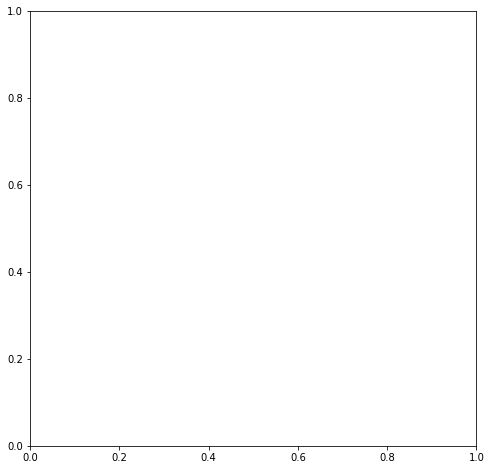

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()